In [81]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [82]:
movies_df = pd.read_csv('movies_data.csv')

In [83]:
month_movies_df = movies_df.sort_values(by=['month'], ascending=[True])
month_movies_df

,budget,release_date,revenue,title,month,year,rating,season,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
17006,1000000.00,2020-01-01,0.00,Turnt,1,2020,NaN,Winter,Drama,NaN,NaN,NaN,NaN,NaN,NaN
2441,0.00,2010-01-26,0.00,Cane Toads: The Conquest,1,2010,NaN,Winter,Documentary,Comedy,NaN,NaN,NaN,NaN,NaN
2443,0.00,2010-01-10,0.00,I Am Comic,1,2010,R,Winter,Documentary,Comedy,NaN,NaN,NaN,NaN,NaN
6815,0.00,2012-01-28,0.00,In Search of the American Dream,1,2012,PG-13,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2445,0.00,2010-01-01,0.00,Utopia in Four Movements,1,2010,NaN,Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,0.00,2010-12-12,0.00,"The Found Footage Festival Presents ""Zany"" Zin...",12,2010,NaN,Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18344,0.00,2016-12-11,0.00,Made Guys,12,2016,NaN,Holiday,Comedy,NaN,NaN,NaN,NaN,NaN,NaN
18346,0.00,2017-12-22,0.00,Sound It Out: The Untitled LGBTQIA Music Docum...,12,2017,NaN,Holiday,Documentary,Music,NaN,NaN,NaN,NaN,NaN
18320,0.00,2011-12-31,0.00,After Warhol,12,2011,NaN,Holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
test_df = movies_df.drop(columns=['genre_7', 'genre_6', 'genre_5', 'genre_4', 'genre_3', 'genre_2'])
test_df = test_df.sort_values(by=['revenue'], ascending=[False])
rating_test_df = test_df.dropna(subset=['rating'])
rating_test_df

,budget,release_date,revenue,title,month,year,rating,season,genre_1
15167,356000000.00,2019-04-24,2797800564.00,Avengers: Endgame,4,2019,PG-13,Spring,Adventure
15166,300000000.00,2018-04-25,2046239637.00,Avengers: Infinity War,4,2018,PG-13,Spring,Adventure
18,150000000.00,2015-06-06,1671713208.00,Jurassic World,6,2015,PG-13,Summer,Action
19625,260000000.00,2019-07-12,1656943394.00,The Lion King,7,2019,PG,Summer,Adventure
210,220000000.00,2012-04-25,1519557910.00,The Avengers,4,2012,PG-13,Spring,Science Fiction
...,...,...,...,...,...,...,...,...,...
8266,0.00,2015-04-21,0.00,Wingman Inc.,4,2015,R,Spring,Romance
8272,0.00,2012-01-01,0.00,The Creightonville Terror,1,2012,NR,Winter,NaN
8263,0.00,2012-03-09,0.00,The Woodsman,3,2012,R,Spring,Action
8261,0.00,2014-04-11,0.00,Hank and Asha,4,2014,NR,Spring,Comedy


In [85]:
clean_rating_df = rating_test_df[rating_test_df['rating'].isin(['G', 'PG', 'PG-13', 'R'])]

In [86]:
clean_rating_df['profitability'] = clean_rating_df['revenue'] - clean_rating_df['budget']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
clean_budget_df = clean_rating_df.loc[~(clean_rating_df['budget'] == 0)]
clean_genre_df = clean_budget_df.dropna(subset=['genre_1'])
clean_genre_df

,budget,release_date,revenue,title,month,year,rating,season,genre_1,profitability
15167,356000000.00,2019-04-24,2797800564.00,Avengers: Endgame,4,2019,PG-13,Spring,Adventure,2441800564.00
15166,300000000.00,2018-04-25,2046239637.00,Avengers: Infinity War,4,2018,PG-13,Spring,Adventure,1746239637.00
18,150000000.00,2015-06-06,1671713208.00,Jurassic World,6,2015,PG-13,Summer,Action,1521713208.00
19625,260000000.00,2019-07-12,1656943394.00,The Lion King,7,2019,PG,Summer,Adventure,1396943394.00
210,220000000.00,2012-04-25,1519557910.00,The Avengers,4,2012,PG-13,Spring,Science Fiction,1299557910.00
...,...,...,...,...,...,...,...,...,...,...
8144,2500000.00,2013-09-06,0.00,Hell Baby,9,2013,R,Fall,Comedy,-2500000.00
8200,2.00,2013-02-14,0.00,Forbidden Woman,2,2013,R,Winter,Drama,-2.00
8219,12000000.00,2014-09-05,0.00,The Identical,9,2014,PG,Fall,Music,-12000000.00
8289,750.00,2013-10-26,0.00,Monster & Me,10,2013,G,Fall,Family,-750.00


In [88]:
corr = clean_budget_df.corr()

In [89]:
sns.set(color_codes=True)

In [90]:
import numpy as np

In [91]:
clean_genre_df.groupby('genre_1')['profitability'].mean()

genre_1
Action            143629198.52
Adventure         229613521.69
Animation         192710709.09
Comedy             41234480.00
Crime              42122561.08
Documentary         5389731.12
Drama              37924907.04
Family            128861324.48
Fantasy           132988811.76
History           110437972.25
Horror             38510408.83
Music               3645594.57
Mystery            56512857.65
Romance            39369411.89
Science Fiction   190349384.77
Thriller           29136054.56
War                62206731.82
Western            73279571.20
Name: profitability, dtype: float64

In [92]:
pd.options.display.float_format = "{:.2f}".format

clean_genre_df.describe()

,budget,revenue,month,year,profitability
count,1882.00,1882.00,1882.00,1882.00,1882.00
mean,40779285.21,125671173.77,6.68,2013.94,84891888.57
std,53645288.73,238724496.30,3.45,2.79,199376234.66
min,1.00,0.00,1.00,2009.00,-200000000.00
25%,5000000.00,0.00,4.00,2012.00,-3771525.25
50%,20000000.00,30941915.00,7.00,2014.00,7514439.00
75%,50000000.00,134257291.50,10.00,2016.00,84690749.75
max,380000000.00,2797800564.00,12.00,2020.00,2441800564.00


In [93]:
clean_genre_df

,budget,release_date,revenue,title,month,year,rating,season,genre_1,profitability
15167,356000000.00,2019-04-24,2797800564.00,Avengers: Endgame,4,2019,PG-13,Spring,Adventure,2441800564.00
15166,300000000.00,2018-04-25,2046239637.00,Avengers: Infinity War,4,2018,PG-13,Spring,Adventure,1746239637.00
18,150000000.00,2015-06-06,1671713208.00,Jurassic World,6,2015,PG-13,Summer,Action,1521713208.00
19625,260000000.00,2019-07-12,1656943394.00,The Lion King,7,2019,PG,Summer,Adventure,1396943394.00
210,220000000.00,2012-04-25,1519557910.00,The Avengers,4,2012,PG-13,Spring,Science Fiction,1299557910.00
...,...,...,...,...,...,...,...,...,...,...
8144,2500000.00,2013-09-06,0.00,Hell Baby,9,2013,R,Fall,Comedy,-2500000.00
8200,2.00,2013-02-14,0.00,Forbidden Woman,2,2013,R,Winter,Drama,-2.00
8219,12000000.00,2014-09-05,0.00,The Identical,9,2014,PG,Fall,Music,-12000000.00
8289,750.00,2013-10-26,0.00,Monster & Me,10,2013,G,Fall,Family,-750.00


In [94]:
last_ten_years = clean_genre_df.loc[clean_genre_df['year']>=2010]
last_ten_years

# created a subset of data using year > 1970 to focus on the last 50 years of blockbuster movies only 

,budget,release_date,revenue,title,month,year,rating,season,genre_1,profitability
15167,356000000.00,2019-04-24,2797800564.00,Avengers: Endgame,4,2019,PG-13,Spring,Adventure,2441800564.00
15166,300000000.00,2018-04-25,2046239637.00,Avengers: Infinity War,4,2018,PG-13,Spring,Adventure,1746239637.00
18,150000000.00,2015-06-06,1671713208.00,Jurassic World,6,2015,PG-13,Summer,Action,1521713208.00
19625,260000000.00,2019-07-12,1656943394.00,The Lion King,7,2019,PG,Summer,Adventure,1396943394.00
210,220000000.00,2012-04-25,1519557910.00,The Avengers,4,2012,PG-13,Spring,Science Fiction,1299557910.00
...,...,...,...,...,...,...,...,...,...,...
8144,2500000.00,2013-09-06,0.00,Hell Baby,9,2013,R,Fall,Comedy,-2500000.00
8200,2.00,2013-02-14,0.00,Forbidden Woman,2,2013,R,Winter,Drama,-2.00
8219,12000000.00,2014-09-05,0.00,The Identical,9,2014,PG,Fall,Music,-12000000.00
8289,750.00,2013-10-26,0.00,Monster & Me,10,2013,G,Fall,Family,-750.00


In [95]:
blockbuster_movies_by_year = last_ten_years['year'].value_counts()
blockbuster_movies_by_year

# blockbuster movies by counts to evaluate general trend 

2011    242
2013    232
2010    226
2012    215
2014    199
2016    180
2015    168
2017    151
2018    150
2019    102
2020     16
Name: year, dtype: int64

In [32]:
blockbuster_movies_by_year.describe()

count    11.00
mean    171.00
std      66.50
min      16.00
25%     150.50
50%     180.00
75%     220.50
max     242.00
Name: year, dtype: float64

In [33]:
blockbuster_movies_by_revenue = last_ten_years['revenue'].mean()
blockbuster_movies_by_revenue

# blockbuster movies by counts to evaluate general trend 

125737984.60552898

In [34]:
clean_genre_df.to_csv('clean_movie_data_final.csv')

### Visualizations
- In our first utilization, we utilized a heatmap to explore the correlation between the budget and profitability showed a strong positive correlation  
- This enabled us to continue our search for the formula of a succesful movie launch


Text(0.5, 1, 'Profitability by Budget')

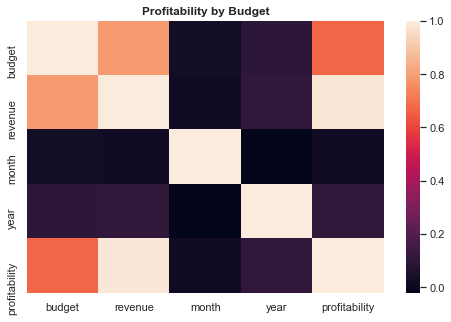

In [125]:
# Calculate correlations
fig, ax = plt.subplots(figsize=(8, 5))
corr = last_ten_years.corr()
 
# Heatmap
sns.heatmap(corr)
ax.set_title('Profitability by Budget', fontweight='bold')


- Following the heatmap, we were able to further explore the sourced data on a granular level using a scatterplot

Text(0.5, 1.0, 'Profitability by Budget')

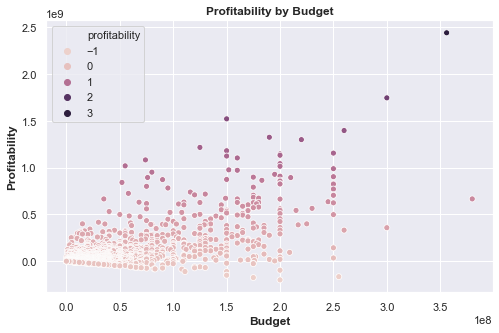

In [127]:
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
data = last_ten_years
sns.scatterplot(data['budget'], data['profitability'], hue=data['profitability'])


plt.xlabel("Budget", fontweight='bold')
plt.ylabel("Profitability", fontweight='bold')
ax.set_title('Profitability by Budget', fontweight='bold')


In [37]:
avg_revenues_by_year = clean_genre_df.groupby('year')['revenue'].mean().reset_index()
avg_revenues_by_year[1:-1]

,year,revenue
1,2010,98035835.15
2,2011,94089866.19
3,2012,113049575.00
4,2013,100029293.84
5,2014,120628240.37
6,2015,137725805.58
7,2016,146245501.27
8,2017,169706522.28
9,2018,139471785.90
10,2019,223577871.42


- Once our team realized the strong correlations we were able to ask our following question: What was the average revenue per year in the past decade?
- We utilized a bar graph to show the breakdown.

Text(0.5, 1.0, 'Average Revenue By Year')

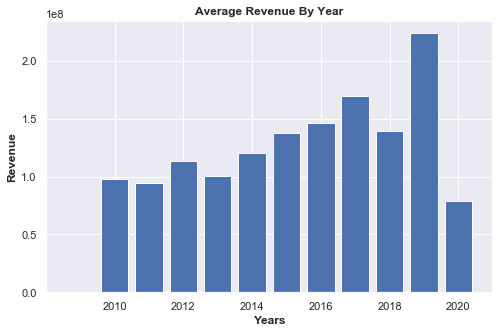

In [130]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x=avg_revenues_by_year['year'],height=avg_revenues_by_year['revenue'])
# Rotate x-labels
plt.xticks(rotation=0)
#Custom X & Y axis labels

plt.xlabel("Years", fontweight='bold')
plt.ylabel("Revenue", fontweight='bold')
ax.set_title('Average Revenue By Year', fontweight='bold')

# 

In [39]:
avg_profitability_by_genre = clean_genre_df.groupby('genre_1')['profitability'].mean().reset_index()
avg_profitability_by_genre[1:-1]

# 

,genre_1,profitability
1,Adventure,229613521.69
2,Animation,192710709.09
3,Comedy,41234480.00
4,Crime,42122561.08
5,Documentary,5389731.12
6,Drama,37924907.04
7,Family,128861324.48
8,Fantasy,132988811.76
9,History,110437972.25
10,Horror,38510408.83


- Did specific genre's more proftibale than others?
- A bar graph allowed us to outline and break down this information in a way that's easily digestable.

Text(0.5, 1.0, 'Profitability by Genre')

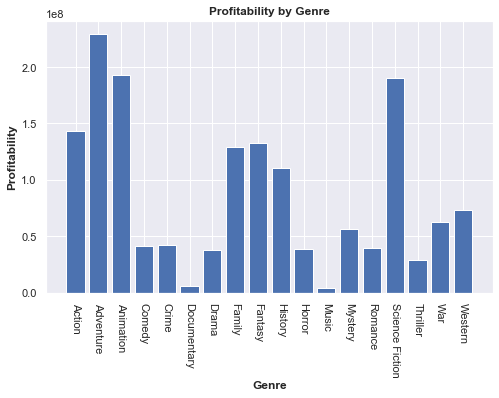

In [131]:
# Count Plot (a.k.a. Bar Plot)
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x=avg_profitability_by_genre['genre_1'],height=avg_profitability_by_genre['profitability'])
# Rotate x-labels
plt.xticks(rotation=-90)

plt.xlabel("Genre", fontweight='bold')
plt.ylabel("Profitability", fontweight='bold')
ax.set_title('Profitability by Genre', fontweight='bold')
# 

In [41]:
key_season = clean_genre_df.groupby('season')['profitability'].mean().reset_index()
top_season = key_season.sort_values('profitability',ascending=False).reset_index()
top_season.head(10)

# 

,index,season,profitability
0,1,Holiday,107784974.38
1,3,Summer,107093482.62
2,2,Spring,100562093.50
3,0,Fall,55206922.49
4,4,Winter,45747934.77


- Once were had our data regarding genre's, when is the best time to release a featured film?
- A bar graph was used to show the profitability by season. 

Text(0.5, 1.0, 'Profitability by Season')

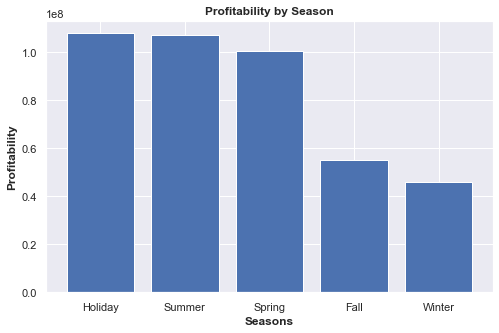

In [132]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x=top_season['season'],height=top_season['profitability'])
plt.xticks(rotation=0)

plt.xlabel("Seasons", fontweight='bold')
plt.ylabel("Profitability", fontweight='bold')
ax.set_title('Profitability by Season', fontweight='bold')

In [43]:
avg_profitability_by_rating = clean_genre_df.groupby('rating')['profitability'].mean().reset_index()
avg_profitability_by_rating


,rating,profitability
0,G,116972115.16
1,PG,144701510.33
2,PG-13,128960083.59
3,R,31573418.97


- Based on the genre type, is there any correlation between profitability and MPAA rating? 
- A bar graph showed us that there are specific months which tend to be most profitable.

Text(0.5, 1.0, 'Profitability by MPAA Rating')

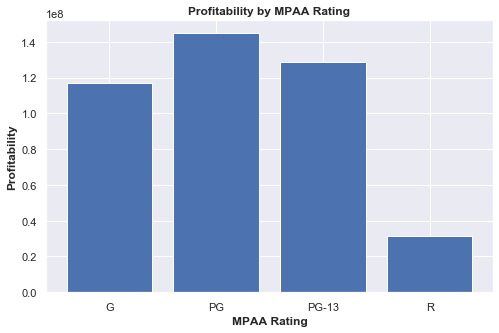

In [133]:
# Count Plot (a.k.a. Bar Plot)

fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x=avg_profitability_by_rating['rating'],height=avg_profitability_by_rating['profitability'])
# Rotate x-labels
plt.xticks(rotation=0)

plt.xlabel("MPAA Rating", fontweight='bold')
plt.ylabel("Profitability", fontweight='bold')
ax.set_title('Profitability by MPAA Rating', fontweight='bold')
# 

In [49]:
actors = pd.read_csv('./movie_actor.csv')

In [51]:
sum_revenue_by_actor = actors.groupby('name')['revenue'].sum().reset_index()

In [52]:
top_sum_revenue_by_actor = sum_revenue_by_actor.sort_values(by = 'revenue', ascending = False).head(25)

- Our final question was which actor should be placed in this featured film? Do specific actors end up making a film more profitable?
- Our data in the bar chart below tells us yes, actors in Marvel movies tend to bring the in the most profitability for films. 

Text(0.5, 1.0, 'Profitability by Actor')

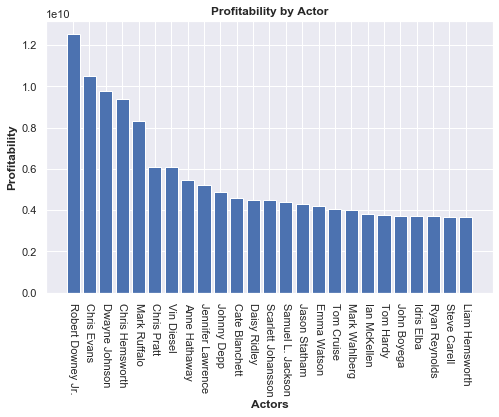

In [134]:
# Count Plot (a.k.a. Bar Plot)
fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x=top_sum_revenue_by_actor['name'],height=top_sum_revenue_by_actor['revenue'])
# Rotate x-labels
plt.xticks(rotation=-90)

plt.xlabel("Actors", fontweight='bold')
plt.ylabel("Profitability", fontweight='bold')
ax.set_title('Profitability by Actor', fontweight='bold')